In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import mpl_toolkits.mplot3d
import open3d as o3d


def get_rsr_signature(lidar_points_orig, DRONE_CENTER, NUM_PTS=40, GRANULARITY=2, REACH_RANGE=60, RADIUS=1, plot_lidar=True):
    indices = np.arange(0, NUM_PTS, dtype=float) + 0.5
    phi = np.arccos(1 - 2*indices/NUM_PTS)
    theta = np.pi * (1 + 5**0.5) * indices
    x, y, z = np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)

    print(x.shape,y.shape,z.shape) # each point represents a 3D direction vector
    plt.figure(figsize=(6, 6)).add_subplot(111, projection='3d').scatter(x, y, z)
    plt.show()


    beam_dvs = np.column_stack((x, y, z)) # direction vector list
    print(beam_dvs.shape)

    lidar_points = lidar_points_orig + DRONE_CENTER
    lidar_boundary_points = (beam_dvs * REACH_RANGE)

    STEPS = REACH_RANGE // GRANULARITY # 30 steps, of 2 granularity each all the way till 60
    print(STEPS)
    truncated_lidar_points = np.zeros(lidar_boundary_points.shape)
    for i, orig_point in enumerate(lidar_boundary_points):
        for t in range(STEPS, 0, -1): # 5, 4, 3, 2, 1
            t_point = orig_point / t
            
            inside = (lidar_points-t_point)**2
            distances = np.sum(inside, axis=1)
            points_in_radius = np.sum(distances<RADIUS**2)
            if points_in_radius > 0:
                truncated_lidar_points[i] = t_point
                break
            else:
                truncated_lidar_points[i] = orig_point

    rsr_signature = np.linalg.norm(truncated_lidar_points, axis=1)
    rsr_signature
    
    if plot_lidar:
        d = o3d.geometry.PointCloud()
        d.points = o3d.utility.Vector3dVector(beam_dvs)   
        d.paint_uniform_color([1, 0, 0]) 

        l = o3d.geometry.PointCloud()
        l.points = o3d.utility.Vector3dVector(lidar_points)
        l.paint_uniform_color([1, 0.5, 0]) 

        tl = o3d.geometry.PointCloud()
        tl.points = o3d.utility.Vector3dVector(truncated_lidar_points)
        tl.paint_uniform_color([0, 0.3, 0.206]) 

        o3d.visualization.draw_geometries([d, l, tl])

    return rsr_signature

(6155, 3)
(40,) (40,) (40,)


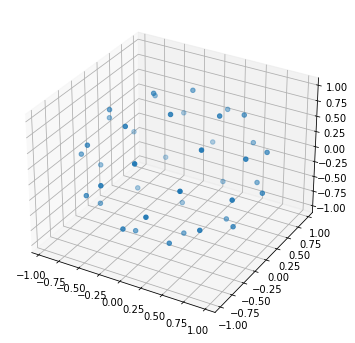

(40, 3)
30
LidarOutputs\lidar_t1.npy
[12. 12. 12. 60. 60. 60. 15. 60. 60. 60. 60. 60. 20. 60. 60. 60. 60. 60.
 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60.
 60. 60. 60. 60.]
Updated Physcov: 0.06 %
[12. 12. 12. 60. 60. 60. 15. 60. 60. 60. 60. 60. 20. 60. 60. 60. 60. 60.
 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60.
 60. 60. 60. 60.]
(6082, 3)
(40,) (40,) (40,)


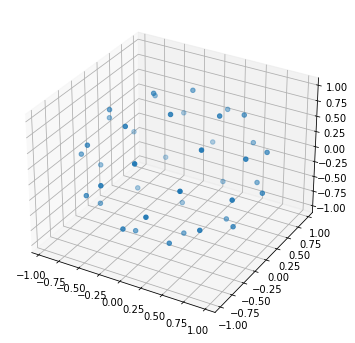

(40, 3)
30
LidarOutputs\lidar_t2.npy
[60. 12. 12. 60. 60. 60. 60. 60. 60. 60. 60. 60. 20. 60. 60. 60. 60. 60.
 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 30. 60. 60. 60. 60. 60. 60. 60.
 60. 60. 60. 60.]
Updated Physcov: 0.12 %
[60. 12. 12. 60. 60. 60. 60. 60. 60. 60. 60. 60. 20. 60. 60. 60. 60. 60.
 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 30. 60. 60. 60. 60. 60. 60. 60.
 60. 60. 60. 60.]
(6021, 3)
(40,) (40,) (40,)


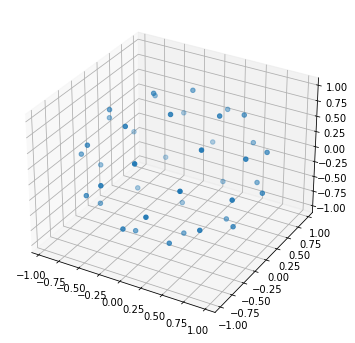

(40, 3)
30
LidarOutputs\lidar_t3.npy
[12. 12. 60. 60. 15. 15. 60. 60. 60. 60. 60. 60. 20. 60. 60. 60. 60. 60.
 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60.
 60. 60. 60. 60.]
Updated Physcov: 0.19 %
[12. 12. 60. 60. 15. 15. 60. 60. 60. 60. 60. 60. 20. 60. 60. 60. 60. 60.
 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60.
 60. 60. 60. 60.]
(6018, 3)
(40,) (40,) (40,)


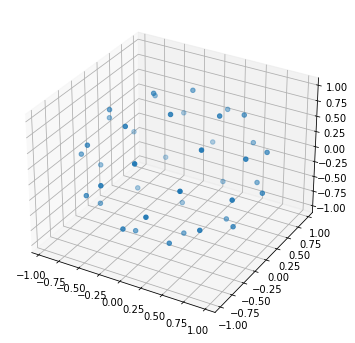

(40, 3)
30
LidarOutputs\lidar_t4.npy
[12. 12. 12. 60. 60. 60. 60. 60. 60. 60. 60. 60. 20. 60. 60. 60. 60. 60.
 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60.
 60. 60. 60. 60.]
Updated Physcov: 0.25 %
[12. 12. 12. 60. 60. 60. 60. 60. 60. 60. 60. 60. 20. 60. 60. 60. 60. 60.
 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60. 60.
 60. 60. 60. 60.]
Final Physcov: 0.25 %


In [70]:
CENTER = np.array((-10, -30, 10)) # HARDCODED, GET FROM LIDAR POSE

unique_rsr_signatures = []
N = 0 # number of unique RSR signatures
x = 40 # number of RSR beams / points
g = 2 # granularity (beam collision detection step intervals)
reach_range = 60
radius = 1
physcov = 0
g_x = pow(g, x//10)  # big number otherwise, so for now x/10

for fid in range(1,5):
    lidar_points_file = 'LidarOutputs\\lidar_t'+str(fid)+'.npy'
    lidar_points_orig = np.load(lidar_points_file)
    print(lidar_points_orig.shape)
    new_rsr = get_rsr_signature(lidar_points_orig=lidar_points_orig, DRONE_CENTER=CENTER, NUM_PTS=x, GRANULARITY=g, REACH_RANGE=reach_range, RADIUS=radius, plot_lidar=True)
    print(lidar_points_file)
    print(new_rsr)

    is_unique = True
    for signature in unique_rsr_signatures:
        if np.array_equal(new_rsr, signature):
            is_unique = False

    if is_unique: # is unique
        unique_rsr_signatures.append(new_rsr)
        N += 1    
        # print(N, g_x)
        physcov = N / g_x
        print("Updated Physcov:","{:.2f}".format(physcov),"%")
        print(new_rsr)

print("Final Physcov:","{:.2f}".format(physcov),"%")